In [1]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
def set_group(value):
    if value < 18.5:
        return 'Underweight'
    elif (value >= 18.5) & (value <= 24.9):
        return 'Normal'
    elif (value >= 25) & (value <= 29.9):
        return 'Overweight'
    elif value >=30:
        return 'Obese'

In [4]:
df['BMI_group'] = df['bmi'].apply(lambda x: set_group(x))
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Handling Categorical Variables
Description
Encode all categorical features such that they can be used in a regression model.
i.e.
sex, BMI_group, smoker and region should be labelled properly.

Note: Use the label encoder for all features. You can read more about it here.

The output should have first five rows of the resulting dataframe. 

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder() # Creating Object of LabelEncoder

In [9]:
#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,0,27.900,0,yes,southwest,16884.92400,Overweight
1,18,1,33.770,1,no,southeast,1725.55230,Obese
2,28,1,33.000,3,no,southeast,4449.46200,Obese
3,33,1,22.705,0,no,northwest,21984.47061,Normal
4,32,1,28.880,0,no,northwest,3866.85520,Overweight


In [11]:
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,0,27.900,0,1,southwest,16884.92400,Overweight
1,18,1,33.770,1,0,southeast,1725.55230,Obese
2,28,1,33.000,3,0,southeast,4449.46200,Obese
3,33,1,22.705,0,0,northwest,21984.47061,Normal
4,32,1,28.880,0,0,northwest,3866.85520,Overweight


In [12]:
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
#changing data type
df.BMI_group=df.BMI_group.astype(str)
le.fit(df.BMI_group.drop_duplicates()) 
df.BMI_group = le.transform(df.BMI_group)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,3


In [14]:
import seaborn as sns

<AxesSubplot: >

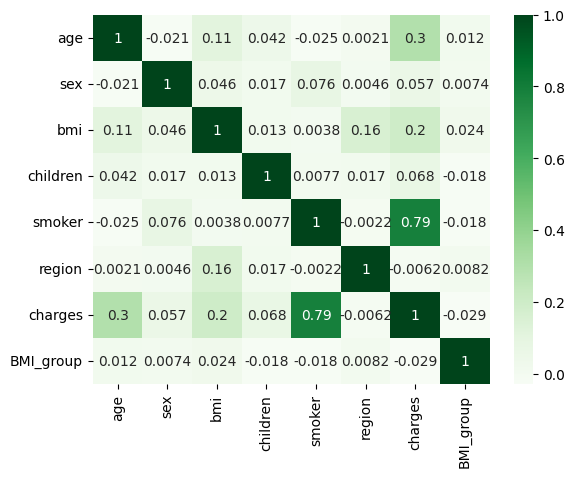

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")

In [17]:
print(round(df.smoker.corr(df.bmi),4))
print(round(df.smoker.corr(df.age),4))
print(round(df.smoker.corr(df.charges),4))

0.0038
-0.025
0.7873


In [20]:

print("{0:.4f}".format(df.smoker.corr(df.bmi)))
print("{0:.4f}".format(df.smoker.corr(df.age)))
print("{0:.4f}".format(df.smoker.corr(df.charges)))

0.0038
-0.0250
0.7873


In [23]:
import numpy as np
import pandas as pd

# Read training data
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/72Boxj99702g8BwK5powGz1g0/insurance_training.csv")

# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/gxVjwe1k3YEogYK23O8PPnXod/insurance_test.csv")

# Linear regression
#import required libraries
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.array(train['smoker']).reshape(-1,1)
y = train['charges']
lr.fit(X,y)

y_test_pred=lr.predict(np.array(test['smoker']).reshape(-1,1))

# Write the output
#THESE TWO LINES SHOULD NOT BE EDITED
test["predicted_charges"]=y_test_pred
test.to_csv("/code/output/predictions.csv")

In [24]:
y_test_pred

array([ 8578.322548  ,  8578.322548  ,  8578.322548  , ...,
        8578.322548  , 31767.00841868,  8578.322548  ])

In [26]:
import numpy as np
import pandas as pd

# Read training data
train = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/QNdMORzykKkG4L3WQ17Xx53o3/insurance_training.csv")

# Read test data
test = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/Mq5p8YpQoz3KbWJRE4Mey1Yoq/insurance_test.csv")

# Linear regression
#import required libraries
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.drop(["region","charges"],axis=1),train['charges'])
y_test_predicted=lr.predict(test.drop("region",axis=1))

y_test_predicted

# Write the output
#Do not edit the last two lines here
#reload test set before this step if you have made any changes to the test set 
# test["predicted_charges"]=y_test_predicted
# test.to_csv("/code/output/predictions.csv")

array([ 8233.66627908,  7133.99557465, 36539.77658343,  9373.18986023,
       26696.81408728, 11521.91865823,   670.0688952 , 16898.99849971,
         271.80488701, 10827.17516814, 28957.21448982,  9298.65413815,
        4807.34961646, 38367.84514024, 40561.43934129, 37391.9640758 ,
       15393.96430621, 36060.08012723,  8909.71957618, 31141.57855682,
        4538.25077504, 10494.674237  ,  2700.28040808,  6359.18660722,
       11102.23348588, 12489.09010242, 15007.80496777,  5970.50726883,
        8975.58372566,  2504.36005446,  9394.82743639, 13081.39524588,
        4780.0756166 ,  4025.2656824 ,  5089.5227739 , 12644.38825411,
        1834.10577291,  9112.09928779, 33887.1935004 , 32477.28544689,
        3560.01915536,  4203.94505571, 14649.04800384, 11230.08999952,
        8834.02451893, 11933.14438396,  4884.14162274,  4051.09984809,
       35507.13705342,  9137.67063033, 15996.5710793 ,  2005.71743369,
       12316.30136984,  1026.15665778, 13926.13307625, 12300.09453839,
      